In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import datasets, linear_model
from itertools import accumulate
from datetime import timedelta  
import time
%matplotlib inline  

In [149]:
df = pd.read_csv('analyze_me.csv')

In [150]:
df.shape

(5983, 18)

In [151]:
# approch
# place_category - check if place_category can be filled for missing



In [195]:
df.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,time_to_deliver
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,00:19:58.582052,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088,01:00:06.414164
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,00:25:09.107093,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.654910,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873,01:00:24.293963
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,00:06:44.541717,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962,00:24:47.980568
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaN,40.738868,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061,00:38:26.558167
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),00:03:45.035418,40.726110,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595,00:41:08.700090


In [162]:
df.describe()

,delivery_id,customer_id,jumpman_id,item_quantity,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,time_to_deliver
count,5.983000e+03,5983.000000,5983.000000,4753.000000,5983.000000,5983.000000,5983.000000,5983.000000,5983.000000
mean,1.379495e+06,176472.595521,102661.602541,1.248264,40.741425,-73.987101,40.744216,-73.985765,46.081178
std,6.459397e+04,116414.487842,48607.211795,0.785904,0.022833,0.014896,0.025251,0.018060,20.226641
min,1.271706e+06,242.000000,3296.000000,1.000000,40.665611,-74.015837,40.649356,-74.017679,3.047181
25%,1.322792e+06,77817.000000,60761.000000,1.000000,40.724340,-73.996630,40.725307,-74.000297,32.667249
50%,1.375689e+06,131093.000000,113364.000000,1.000000,40.735677,-73.988682,40.740424,-73.989280,42.674769
75%,1.436371e+06,293381.000000,143807.000000,1.000000,40.758726,-73.980739,40.763885,-73.974696,55.126968
max,1.491424e+06,405547.000000,181543.000000,16.000000,40.818082,-73.920980,40.848324,-73.924124,340.308810


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5983 entries, 0 to 5982
Data columns (total 19 columns):
delivery_id                            5983 non-null int64
customer_id                            5983 non-null int64
jumpman_id                             5983 non-null int64
vehicle_type                           5983 non-null object
pickup_place                           5983 non-null object
place_category                         5100 non-null object
item_name                              4753 non-null object
item_quantity                          4753 non-null float64
item_category_name                     4753 non-null object
how_long_it_took_to_order              3038 non-null object
pickup_lat                             5983 non-null float64
pickup_lon                             5983 non-null float64
dropoff_lat                            5983 non-null float64
dropoff_lon                            5983 non-null float64
when_the_delivery_started              5983 non-nul

In [155]:
df['when_the_delivery_started'] = df['when_the_delivery_started'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S.%f'))

In [156]:
df['when_the_Jumpman_arrived_at_dropoff'] = df['when_the_Jumpman_arrived_at_dropoff'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S.%f'))

In [198]:
df['time_to_deliver'] = df['when_the_Jumpman_arrived_at_dropoff'] - df['when_the_delivery_started'] 

In [199]:
df['time_to_deliver'] = df['time_to_deliver'].apply(lambda x: round(x/np.timedelta64(1,'m')))

In [201]:
df['time_to_deliver'].head()

0    60
1    60
2    25
3    38
4    41
Name: time_to_deliver, dtype: int64

(array([  1.,   2.,   0.,   0.,   1.,   4.,   3.,   2.,   9.,   9.,   7.,
          9.,  12.,  21.,  36.,  39.,  34.,  50.,  81.,  60.,  66.,  58.,
         95., 100., 115., 119., 122., 125., 140., 158., 155., 168., 130.,
        144., 140., 146., 151., 158., 148., 154., 141., 136., 132., 137.,
        111., 155., 115., 119.,  97., 114., 104.,  92.,  96., 104.,  86.,
         85.,  70.,  79.,  49.,  60.,  42.,  31.,  57.,  56.,  55.,  29.,
         35.,  33.,  34.,  31.,  30.,  19.,  37.,  21.,  31.,  24.,  19.,
         12.,  16.,  11.,  13.,  12.,  22.,  22.,  18.,   9.,  20.,   8.,
          9.,  14.,   8.,  12.,   7.,   3.,   7.,   6.,   7.,   8.,   3.,
          3.,   6.,   0.,   3.,   0.,   3.,   5.,   4.,   4.,   2.,   4.,
          3.,   2.,   7.,   0.,   0.,   2.,   6.,   0.,   1.,   6.,   1.,
          1.,   0.,   2.,   0.,   2.,   0.,   1.,   2.,   0.,   1.,   0.,
          2.,   0.,   0.,   0.,   0.,   6.,   0.,   0.,   1.,   1.,   0.,
          1.,   1.,   0.,   0.,   0., 

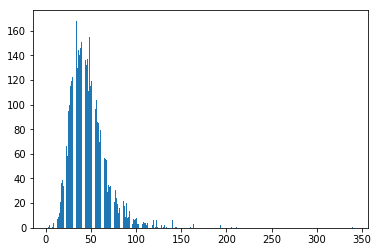

In [216]:
plt.hist(df['time_to_deliver'],bins=df['time_to_deliver'].max()-df['time_to_deliver'].min(), rwidth=.7)


In [202]:
df_nonnull = df.dropna()

In [207]:
df_time_to_order = df[df['how_long_it_took_to_order'].notnull()]

In [210]:
df_time_to_order.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,time_to_deliver
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,20,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088,60
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,25,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.654910,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873,60
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,7,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962,25
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),4,40.726110,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595,41
5,1423142,75169,91932,bicycle,Tamarind TriBeCa,Indian,Dum Aloo Gobi,1.0,Vegetarian Specialties,7,40.719269,-74.008750,40.725678,-74.000618,2014-10-22 18:56:36.348939,2014-10-22 19:18:49.953427,2014-10-22 19:27:10.57897,2014-10-22 19:36:53.801191,40


In [209]:
df_time_to_order['how_long_it_took_to_order'] = df_time_to_order['how_long_it_took_to_order'].apply(lambda x: round(pd.to_timedelta(x).total_seconds()/60))




/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(array([  2., 102., 308., 375., 422., 387., 317., 252., 148., 149., 111.,
         75.,  45.,  53.,  45.,  38.,  27.,  27.,  27.,  16.,  15.,  18.,
         13.,   8.,   8.,   6.,  12.,   2.,   1.,   5.,   4.,   5.,   1.,
          0.,   2.,   1.,   1.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
        53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
        66., 67., 68., 69., 70., 71., 72., 73.]),
 <a list of 72 Patch objects>)

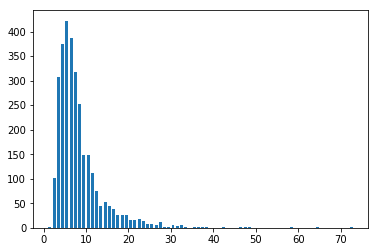

In [212]:
plt.hist(df_time_to_order['how_long_it_took_to_order'],bins=df_time_to_order['how_long_it_took_to_order'].max()-df_time_to_order['how_long_it_took_to_order'].min(), rwidth=.7)
# round(df_time_to_order['how_long_it_took_to_order'].max()-df_time_to_order['how_long_it_took_to_order'].min())

